# DA - NCAA - Feature Diagrams

## Suggestion A

In this example we use histograms and XY scatter diagrams to visualise the data of the features.  
Using the histogram we can determine the variance of the observed feature.  
Using the XY scatter diagrams we can see the correlation of the observed feature with the target.  

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
from sklearn import linear_model, model_selection, metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## All Dimensions/Features/Variables:
Season - used as filter to distinguish between train and test data sets  
WL - Target (0-loss, 1-win)  
  
Team 1 features:  
T1_AdjEM  
T1_AdjO  
T1_AdjD  
T1_AdjT  
T1_Luck  
T1_SOSADjEM  
T1_SOSOppO  
T1_SOSOppD  
T1_NCSOSAdjEM  
  
Team 2 features:  
T2_AdjEM  
T2_AdjO  
T2_AdjD  
T2_AdjT  
T2_Luck  
T2_SOSADjEM  
T2_SOSOppO  
T2_SOSOppD  
T2_NCSOSAdjEM  

In [2]:
# Load the data into DataFrame
data = pd.read_csv('dataset/All_PCBR_For_2002_2016_Matchup.csv')
data.head()

,Season,WL,T1_AdjEM,T1_AdjO,T1_AdjD,T1_AdjT,T1_Luck,T1_SOSADjEM,T1_SOSOppO,T1_SOSOppD,T1_NCSOSAdjEM,T2_AdjEM,T2_AdjO,T2_AdjD,T2_AdjT,T2_Luck,T2_SOSADjEM,T2_SOSOppO,T2_SOSOppD,T2_NCSOSAdjEM
0,2002,0,-8.69,98.1,106.8,74.2,0.097,-15.24,93.2,108.4,-2.29,-1.20,98.6,99.8,68.9,-0.070,-3.90,98.7,102.6,-1.15
1,2002,1,18.73,111.9,93.2,69.1,0.076,9.90,106.3,96.4,2.49,-2.48,97.5,100.0,71.6,0.061,-5.12,100.3,105.4,-5.36
2,2002,1,20.52,117.2,96.7,73.0,0.080,14.48,109.9,95.4,18.68,8.90,106.1,97.2,64.8,-0.058,0.23,101.4,101.2,2.86
3,2002,1,34.14,118.9,84.7,75.9,-0.027,10.09,107.8,97.7,7.52,-5.33,95.2,100.5,68.0,0.039,-10.81,95.4,106.2,-1.40
4,2002,1,24.80,112.0,87.2,66.8,-0.049,13.66,109.0,95.4,13.51,14.11,109.4,95.2,63.6,0.011,5.87,104.9,99.0,3.57


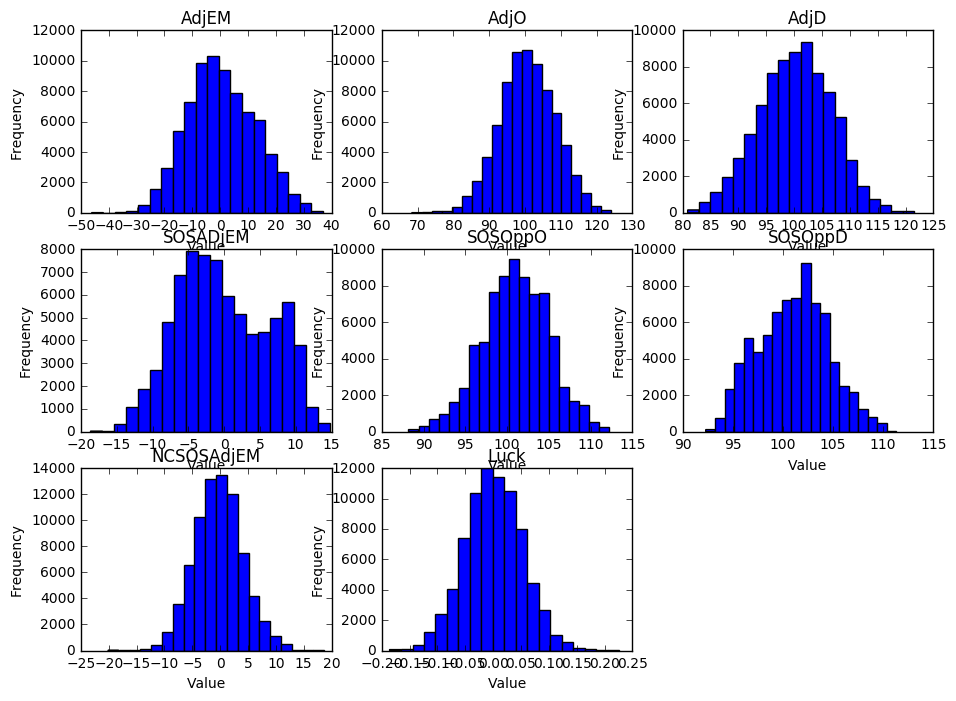

In [3]:
# Histograms
plt.figure(figsize=(11,8))

# Team 1

# AdjEM
plt.subplot(3,3,1)
plt.title('AdjEM')
plt.xlabel('Value')
data.T1_AdjEM.plot.hist(20)

# AdjO
plt.subplot(3,3,2)
plt.title('AdjO')
plt.xlabel('Value')
data.T1_AdjO.plot.hist(20)

# AdjD
plt.subplot(3,3,3)
plt.title('AdjD')
plt.xlabel('Value')
data.T1_AdjD.plot.hist(20)

# SOSADjEM
plt.subplot(3,3,4)
plt.title('SOSADjEM')
plt.xlabel('Value')
data.T1_SOSADjEM.plot.hist(20)

# SOSOppO
plt.subplot(3,3,5)
plt.title('SOSOppO')
plt.xlabel('Value')
data.T1_SOSOppO.plot.hist(20)

# SOSOppD
plt.subplot(3,3,6)
plt.title('SOSOppD')
plt.xlabel('Value')
data.T1_SOSOppD.plot.hist(20)

# NCSOSAdjEM
plt.subplot(3,3,7)
plt.title('NCSOSAdjEM')
plt.xlabel('Value')
data.T1_NCSOSAdjEM.plot.hist(20)

# Luck
plt.subplot(3,3,8)
plt.title('Luck')
plt.xlabel('Value')
data.T1_Luck.plot.hist(20)

# Show all
plt.show()

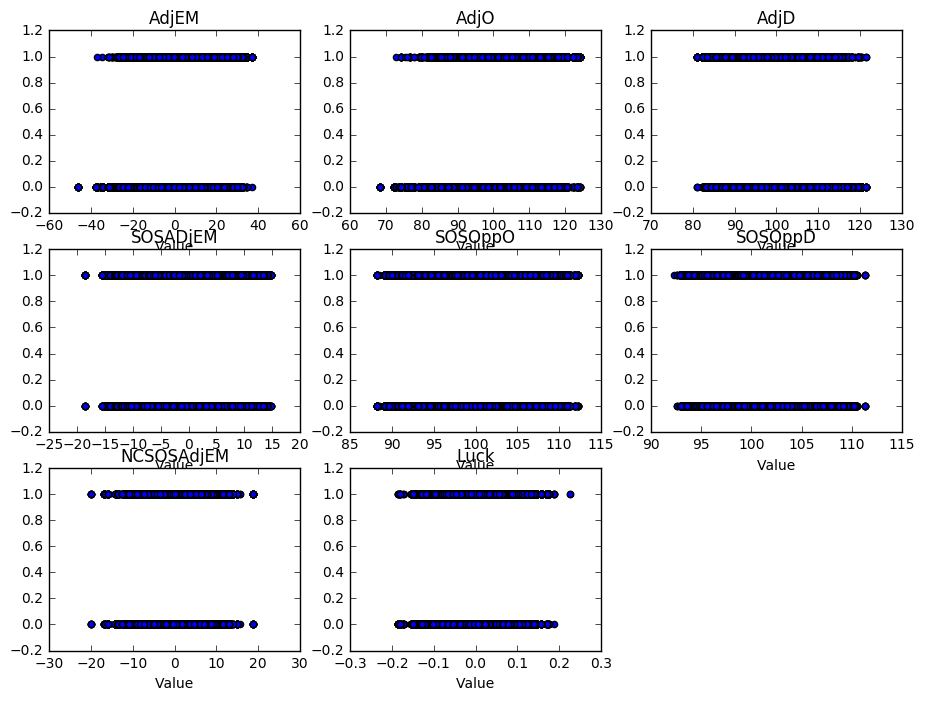

In [4]:
# XY scatter - Correlation
plt.figure(figsize=(11,8))

# Team 1

# AdjEM
plt.subplot(3,3,1)
plt.title('AdjEM')
plt.xlabel('Value')
plt.scatter(data.T1_AdjEM, data.WL)

# AdjO
plt.subplot(3,3,2)
plt.title('AdjO')
plt.xlabel('Value')
plt.scatter(data.T1_AdjO, data.WL)

# AdjD
plt.subplot(3,3,3)
plt.title('AdjD')
plt.xlabel('Value')
plt.scatter(data.T1_AdjD, data.WL)

# SOSADjEM
plt.subplot(3,3,4)
plt.title('SOSADjEM')
plt.xlabel('Value')
plt.scatter(data.T1_SOSADjEM, data.WL)

# SOSOppO
plt.subplot(3,3,5)
plt.title('SOSOppO')
plt.xlabel('Value')
plt.scatter(data.T1_SOSOppO, data.WL)

# SOSOppD
plt.subplot(3,3,6)
plt.title('SOSOppD')
plt.xlabel('Value')
plt.scatter(data.T1_SOSOppD, data.WL)

# NCSOSAdjEM
plt.subplot(3,3,7)
plt.title('NCSOSAdjEM')
plt.xlabel('Value')
plt.scatter(data.T1_NCSOSAdjEM, data.WL)

# Luck
plt.subplot(3,3,8)
plt.title('Luck')
plt.xlabel('Value')
plt.scatter(data.T1_Luck, data.WL)

# Show all
plt.show()

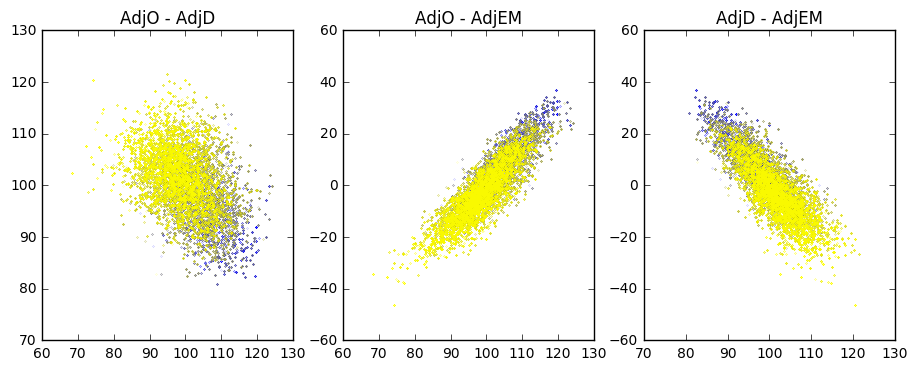

In [39]:
# XY scatter - Correlation
plt.figure(figsize=(11,4))

# AdjO - AdjD
plt.subplot(1,3,1)
plt.title('AdjO - AdjD')
plt.scatter(data.loc[data.WL == 1].T1_AdjO, data.loc[data.WL == 1].T1_AdjD, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_AdjO, data.loc[data.WL == 0].T1_AdjD, color='yellow', s=0.01) # Lost

# AdjO - AdjEM
plt.subplot(1,3,2)
plt.title('AdjO - AdjEM')
plt.scatter(data.loc[data.WL == 1].T1_AdjO, data.loc[data.WL == 1].T1_AdjEM, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_AdjO, data.loc[data.WL == 0].T1_AdjEM, color='yellow', s=0.01) # Lost

# AdjD - AdjEM
plt.subplot(1,3,3)
plt.title('AdjD - AdjEM')
plt.scatter(data.loc[data.WL == 1].T1_AdjD, data.loc[data.WL == 1].T1_AdjEM, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_AdjD, data.loc[data.WL == 0].T1_AdjEM, color='yellow', s=0.01) # Lost

# Show all
plt.show()

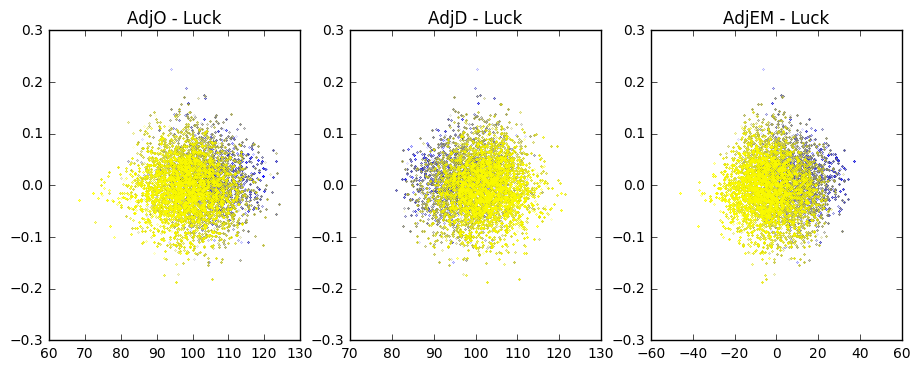

In [40]:
# XY scatter - Correlation
plt.figure(figsize=(11,4))

# AdjO - Luck
plt.subplot(1,3,1)
plt.title('AdjO - Luck')
plt.scatter(data.loc[data.WL == 1].T1_AdjO, data.loc[data.WL == 1].T1_Luck, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_AdjO, data.loc[data.WL == 0].T1_Luck, color='yellow', s=0.01) # Lost

# AdjD - Luck
plt.subplot(1,3,2)
plt.title('AdjD - Luck')
plt.scatter(data.loc[data.WL == 1].T1_AdjD, data.loc[data.WL == 1].T1_Luck, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_AdjD, data.loc[data.WL == 0].T1_Luck, color='yellow', s=0.01) # Lost

# AdjEM - Luck
plt.subplot(1,3,3)
plt.title('AdjEM - Luck')
plt.scatter(data.loc[data.WL == 1].T1_AdjEM, data.loc[data.WL == 1].T1_Luck, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_AdjEM, data.loc[data.WL == 0].T1_Luck, color='yellow', s=0.01) # Lost

# Show all
plt.show()

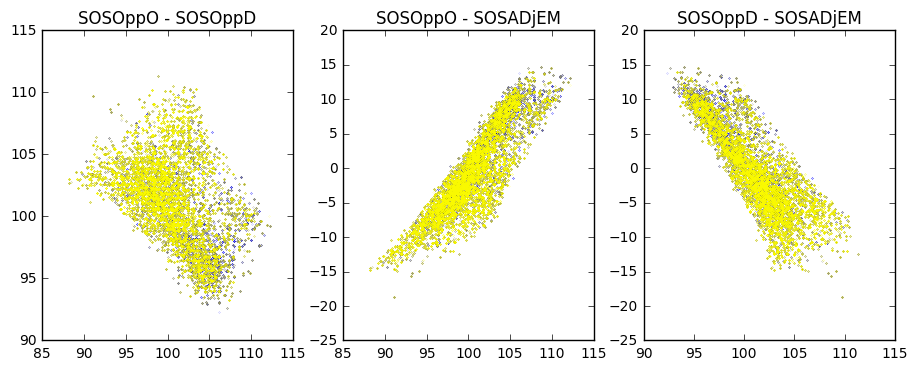

In [42]:
# XY scatter - Correlation
plt.figure(figsize=(11,4))

# SOSOppO - SOSOppD
plt.subplot(1,3,1)
plt.title('SOSOppO - SOSOppD')
plt.scatter(data.loc[data.WL == 1].T1_SOSOppO, data.loc[data.WL == 1].T1_SOSOppD, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_SOSOppO, data.loc[data.WL == 0].T1_SOSOppD, color='yellow', s=0.01) # Lost

# SOSOppO - SOSADjEM
plt.subplot(1,3,2)
plt.title('SOSOppO - SOSADjEM')
plt.scatter(data.loc[data.WL == 1].T1_SOSOppO, data.loc[data.WL == 1].T1_SOSADjEM, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_SOSOppO, data.loc[data.WL == 0].T1_SOSADjEM, color='yellow', s=0.01) # Lost

# SOSOppD - SOSADjEM
plt.subplot(1,3,3)
plt.title('SOSOppD - SOSADjEM')
plt.scatter(data.loc[data.WL == 1].T1_SOSOppD, data.loc[data.WL == 1].T1_SOSADjEM, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_SOSOppD, data.loc[data.WL == 0].T1_SOSADjEM, color='yellow', s=0.01) # Lost

# Show all
plt.show()

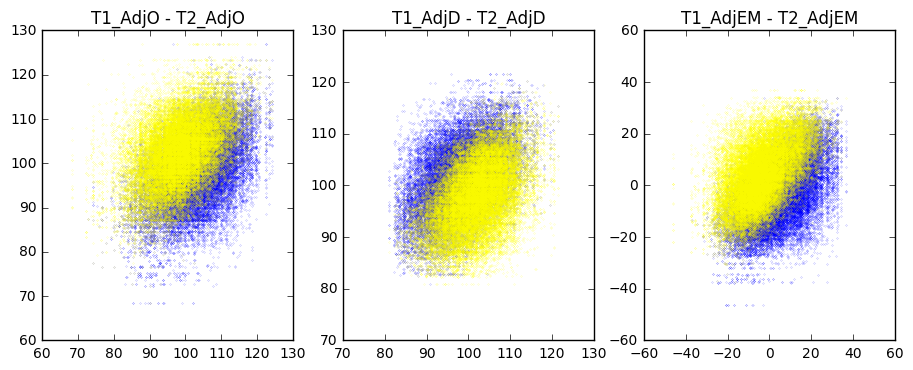

In [44]:
# XY scatter - Correlation
plt.figure(figsize=(11,4))

# Team 1 vs Team 2

# T1_AdjO - T2_AdjO
plt.subplot(1,3,1)
plt.title('T1_AdjO - T2_AdjO')
plt.scatter(data.loc[data.WL == 1].T1_AdjO, data.loc[data.WL == 1].T2_AdjO, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_AdjO, data.loc[data.WL == 0].T2_AdjO, color='yellow', s=0.01) # Lost

# T1_AdjD - T2_AdjD
plt.subplot(1,3,2)
plt.title('T1_AdjD - T2_AdjD')
plt.scatter(data.loc[data.WL == 1].T1_AdjD, data.loc[data.WL == 1].T2_AdjD, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_AdjD, data.loc[data.WL == 0].T2_AdjD, color='yellow', s=0.01) # Lost

# T1_AdjEM - T2_AdjEM
plt.subplot(1,3,3)
plt.title('T1_AdjEM - T2_AdjEM')
plt.scatter(data.loc[data.WL == 1].T1_AdjEM, data.loc[data.WL == 1].T2_AdjEM, color='blue', s=0.01) # Win
plt.scatter(data.loc[data.WL == 0].T1_AdjEM, data.loc[data.WL == 0].T2_AdjEM, color='yellow', s=0.01) # Lost

# Show all
plt.show()

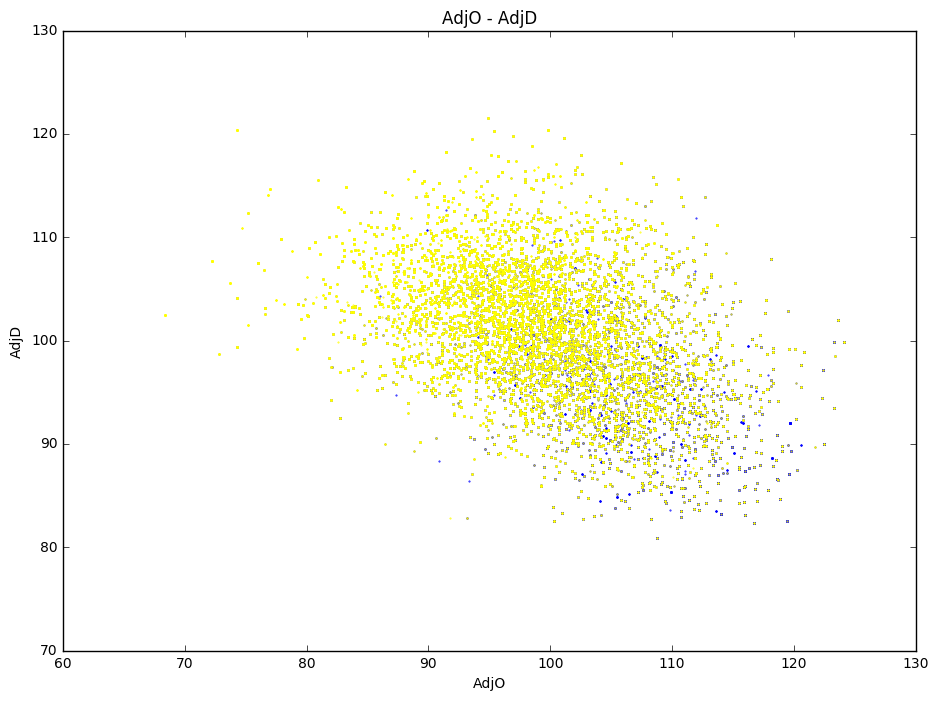

In [29]:
# XY scatter - Correlation - selected
# AdjO - AdjD
plt.figure(figsize=(11,8))
plt.title('AdjO - AdjD')
plt.xlabel('AdjO')
plt.ylabel('AdjD')
plt.scatter(data.loc[data.WL == 1].T1_AdjO, data.loc[data.WL == 1].T1_AdjD, color='blue', s=0.2) # Win
plt.scatter(data.loc[data.WL == 0].T1_AdjO, data.loc[data.WL == 0].T1_AdjD, color='yellow', s=0.2) # Lost

plt.savefig('img/Correlation_AdjO_AdjD.png')
plt.show()

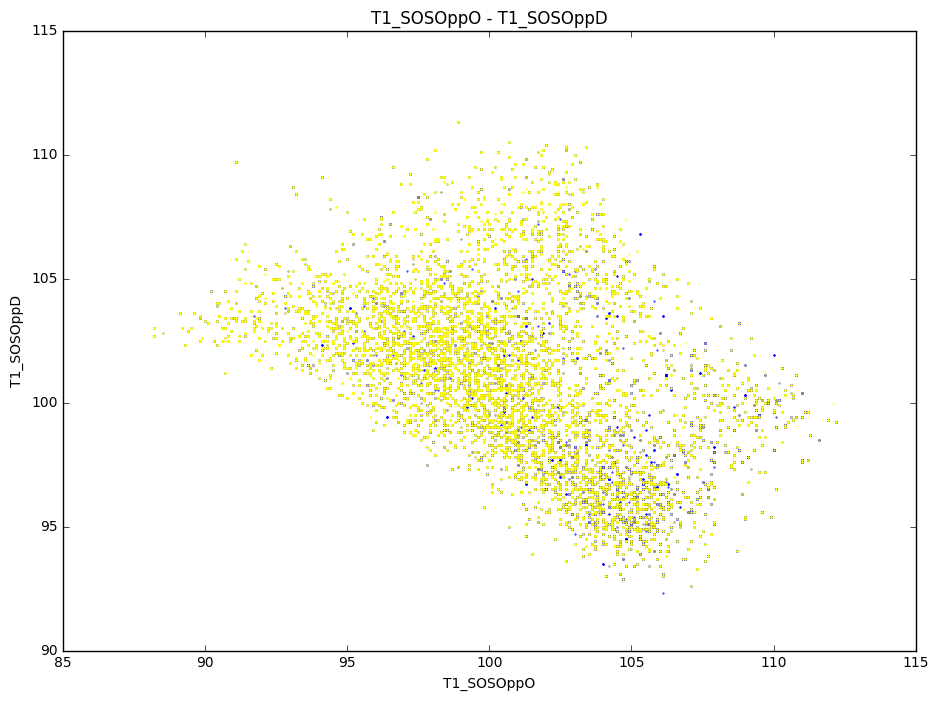

In [30]:
# XY scatter - Correlation - selected
# T1_SOSOppO - T1_SOSOppD
plt.figure(figsize=(11,8))
plt.title('T1_SOSOppO - T1_SOSOppD')
plt.xlabel('T1_SOSOppO')
plt.ylabel('T1_SOSOppD')
plt.scatter(data.loc[data.WL == 1].T1_SOSOppO, data.loc[data.WL == 1].T1_SOSOppD, color='blue', s=0.2) # Win
plt.scatter(data.loc[data.WL == 0].T1_SOSOppO, data.loc[data.WL == 0].T1_SOSOppD, color='yellow', s=0.2) # Lost

plt.savefig('img/Correlation_T1_SOSOppO_T1_SOSOppD.png')
plt.show()